In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
np.random.seed(123)

% matplotlib inline

UsageError: Line magic function `%` not found.


X_train shape: (1347, 64)
y_train shape: (1347,)
X_test shape: (450, 64)
y_test shape: (450,)


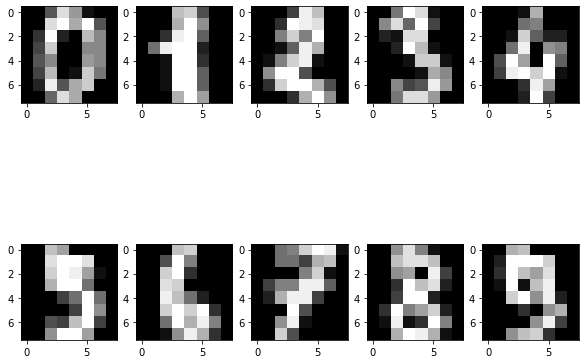

In [4]:

# We will use the digits dataset as an example. It consists of the 1797 images of hand-written digits. Each digit is
# represented by a 64-dimensional vector of pixel values.

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Example digits
fig = plt.figure(figsize=(10,8))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.imshow(X[i].reshape((8,8)), cmap='gray')
    
plt.show()

In [5]:
class kNN():
    def __init__(self):
        pass

    def fit(self, X, y):
        self.data = X
        self.targets = y

    def euclidean_distance(self, X):
        """
        Computes the euclidean distance between the training data and
        a new input example or matrix of input examples X
        """
        # input: single data point
        if X.ndim == 1:
            l2 = np.sqrt(np.sum((self.data - X)**2, axis=1))

        # input: matrix of data points
        if X.ndim == 2:
            n_samples, _ = X.shape
            l2 = [np.sqrt(np.sum((self.data - X[i])**2, axis=1)) for i in range(n_samples)]

        return np.array(l2)

    def predict(self, X, k=1):
        """
        Predicts the classification for an input example or matrix of input examples X
        """
        # step 1: compute distance between input and training data
        dists = self.euclidean_distance(X)

        # step 2: find the k nearest neighbors and their classifications
        if X.ndim == 1:
            if k == 1:
                nn = np.argmin(dists)
                return self.targets[nn]
            else:
                knn = np.argsort(dists)[:k]
                y_knn = self.targets[knn]
                max_vote = max(y_knn, key=list(y_knn).count)
                return max_vote

        if X.ndim == 2:
            knn = np.argsort(dists)[:, :k]
            y_knn = self.targets[knn]
            if k == 1:
                return y_knn.T
            else:
                n_samples, _ = X.shape
                max_votes = [max(y_knn[i], key=list(y_knn[i]).count) for i in range(n_samples)]
                return max_votes

In [6]:
knn = kNN()
knn.fit(X_train, y_train)

print("Testing one datapoint, k=1")
print(f"Predicted label: {knn.predict(X_test[0], k=1)}")
print(f"True label: {y_test[0]}")
print()
print("Testing one datapoint, k=5")
print(f"Predicted label: {knn.predict(X_test[20], k=5)}")
print(f"True label: {y_test[20]}")
print()
print("Testing 10 datapoint, k=1")
print(f"Predicted labels: {knn.predict(X_test[5:15], k=1)}")
print(f"True labels: {y_test[5:15]}")
print()
print("Testing 10 datapoint, k=4")
print(f"Predicted labels: {knn.predict(X_test[5:15], k=4)}")
print(f"True labels: {y_test[5:15]}")
print()

Testing one datapoint, k=1
Predicted label: 9
True label: 9

Testing one datapoint, k=5
Predicted label: 5
True label: 5

Testing 10 datapoint, k=1
Predicted labels: [[3 1 6 4 5 3 3 6 9 9]]
True labels: [3 1 6 4 5 3 3 6 9 9]

Testing 10 datapoint, k=4
Predicted labels: [3, 1, 6, 4, 5, 3, 3, 6, 9, 9]
True labels: [3 1 6 4 5 3 3 6 9 9]



In [10]:
# Compute accuracy on test set
y_p_test1 = knn.predict(X_test, k=1)
test_acc1= np.sum(y_p_test1[0] == y_test)/len(y_p_test1[0]) * 100
print(f"Test accuracy with k = 1: {format(test_acc1)}")

y_p_test3 = knn.predict(X_test, k=3)
test_acc3= np.sum(y_p_test3 == y_test)/len(y_p_test3) * 100
print(f"Test accuracy with k = 3: {format(test_acc3)}")

y_p_test5 = knn.predict(X_test, k=5)
test_acc5= np.sum(y_p_test5 == y_test)/len(y_p_test5) * 100
print(f"Test accuracy with k = 5: {format(test_acc5)}")

Test accuracy with k = 1: 98.66666666666667
Test accuracy with k = 3: 99.11111111111111
Test accuracy with k = 5: 98.66666666666667


# use sklearn

In [11]:
# All the libraries we need for KNN
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
# This is used for our dataset
from sklearn.datasets import load_breast_cancer

In [12]:
# =============================================================================
# We are using sklearn datasets to create the set of data points about breast cancer
# Data is the set data points
# target is the classification of those data points. 
# More information can be found at:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
# =============================================================================
dataCancer = load_breast_cancer()

# The data[:, x:n] gets two features for the data given. 
# The : part gets all the rows in the matrix. And 0:2 gets the first 2 columns 
# If you want to get a different two features you can replace 0:2 with 1:3, 2:4,... 28:30, 
# there are 30 features in the set so it can only go up to 30.
# If we wanted to plot a 3 dimensional plot then the difference between x and n needs to be 3 instead of two
data = dataCancer.data[:, 0:2]
target = dataCancer.target

In [13]:
data[0],target[0]

(array([17.99, 10.38]), 0)

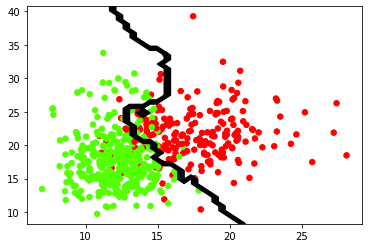

In [14]:
# =============================================================================
# This creates the KNN classifier and specifies the algorithm being used and the k
# nearest neighbors used for the algorithm. more information can about KNeighborsClassifier
# can be found at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
#
# Then it trains the model using the breast cancer dataset. 
# =============================================================================
model = KNeighborsClassifier(n_neighbors = 9, algorithm = 'auto')
model.fit(data, target)


# plots the points 
plt.scatter(data[:, 0], data[:, 1], c=target, s=30, cmap=plt.cm.prism)

# Creates the axis bounds for the grid
axis = plt.gca()
x_limit = axis.get_xlim()
y_limit = axis.get_ylim()

# Creates a grid to evaluate model
x = np.linspace(x_limit[0], x_limit[1])
y = np.linspace(y_limit[0], y_limit[1])
X, Y = np.meshgrid(x, y)
xy = np.c_[X.ravel(), Y.ravel()]

# Creates the line that will separate the data
boundary = model.predict(xy)
boundary = boundary.reshape(X.shape)


# Plot the decision boundary
axis.contour(X, Y,  boundary, colors = 'k')
         
# Shows the graph
plt.show()

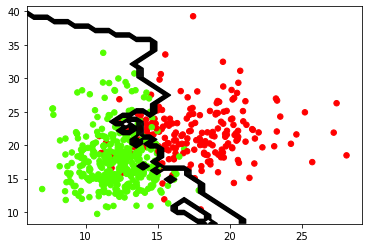

In [17]:
# K-3; k=5 的效果和K=9差不多
model = KNeighborsClassifier(n_neighbors = 3, algorithm = 'auto')
model.fit(data, target)


# plots the points 
plt.scatter(data[:, 0], data[:, 1], c=target, s=30, cmap=plt.cm.prism)

# Creates the axis bounds for the grid
axis = plt.gca()
x_limit = axis.get_xlim()
y_limit = axis.get_ylim()

# Creates a grid to evaluate model
x = np.linspace(x_limit[0], x_limit[1])
y = np.linspace(y_limit[0], y_limit[1])
X, Y = np.meshgrid(x, y)
xy = np.c_[X.ravel(), Y.ravel()]

# Creates the line that will separate the data
boundary = model.predict(xy)
boundary = boundary.reshape(X.shape)


# Plot the decision boundary
axis.contour(X, Y,  boundary, colors = 'k')
         
# Shows the graph
plt.show()